Jacob Graham

5/24/2023



# Plot Stress - Strain Curves for DPD Shear Rate Study

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import statistics

In [11]:
out_path = 'ss_analysis_out'

In [12]:
if os.path.exists(f'{out_path}') == 0:
    os.mkdir(f'{out_path}')

In [2]:
maxstrain = 2 # 60 to 180 in x-direction
volume = 96000 # box x*y*z

In [3]:
seed = ['11111','21111','31111','41111','51111']

In [4]:
erate=['erate0p01','erate0p005','erate0p001','erate0p0005']

In [5]:
stress_in_x_all={}
strain_data_all={}

In [6]:
for e in range(len(erate)):
    stress_in_x_all[erate[e]] = []
    strain_data_all[erate[e]] = []
    for run in range(5):
        with open(f'{os.getcwd()}/run{run+1}/HA1B1A1B1_{erate[e]}/all_stress_{run+1}1111.txt') as f:
            lines = f.readlines()

        data = np.zeros([len(lines)-2,7])
        ii=0
        for line in lines:
            if ii>1:
                data[ii-2] = line.strip('\n').split(' ')
            ii+=1
#         totalsteps = data[-1,0]
        totalsteps = 100000
        print(totalsteps)
        strain_data = (data[:,0]-(data[2,0]-15000))/totalsteps*maxstrain
        stress_data = data[:,1:]/volume

        # xx - 0.5*(yy+zz) Effective stress.
        stress_in_x = stress_data[:,0]-0.5*(stress_data[:,1]+stress_data[:,2])

        stress_in_x_all[erate[e]].append(stress_in_x)
        strain_data_all[erate[e]].append(strain_data)
    avg_stress=np.zeros(20)
    std_stress=np.zeros(20)
    for i in range(len(stress_in_x_all[erate[e]][0])):
        s=np.zeros(5)
        for j in range(5):
            s[j]=stress_in_x_all[erate[e]][j][i]
        avg_stress[i]=sum(s)/len(s)
        std_stress[i]=np.std(s)
    stress_in_x_all[erate[e]].append(avg_stress)
    stress_in_x_all[erate[e]].append(std_stress)
    strain_data_all[erate[e]].append(strain_data)
    strain_data_all[erate[e]].append(strain_data)
    # Get average of curves
    

100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000
100000


In [7]:
stress_in_x_all['erate0p01']

[array([-0.00078125,  0.00255208,  0.0040625 ,  0.00223958, -0.00015625,
         0.00401042,  0.00333333,  0.00338542,  0.0040625 ,  0.00447917,
         0.00067708,  0.00333333,  0.00630208,  0.00625   ,  0.00567708,
         0.005     ,  0.0053125 ,  0.005     ,  0.00333333,  0.0046875 ]),
 array([-0.00359375,  0.00182292,  0.00333333,  0.00307292,  0.00244792,
         0.0009375 ,  0.0025    ,  0.00286458,  0.00432292,  0.00354167,
         0.00385417,  0.00432292,  0.00270833,  0.00630208,  0.0034375 ,
         0.00255208,  0.00359375,  0.00333333,  0.00328125,  0.001875  ]),
 array([0.00015625, 0.00057292, 0.00265625, 0.00197917, 0.00145833,
        0.001875  , 0.00286458, 0.00557292, 0.00020833, 0.00088542,
        0.0034375 , 0.00453125, 0.0065625 , 0.00416667, 0.001875  ,
        0.00182292, 0.00427083, 0.00416667, 0.00505208, 0.00307292]),
 array([-5.20833333e-05,  2.60416667e-04,  9.37500000e-04,  2.08333333e-04,
         8.33333333e-04,  8.85416667e-04,  9.37500000e-04,  1.

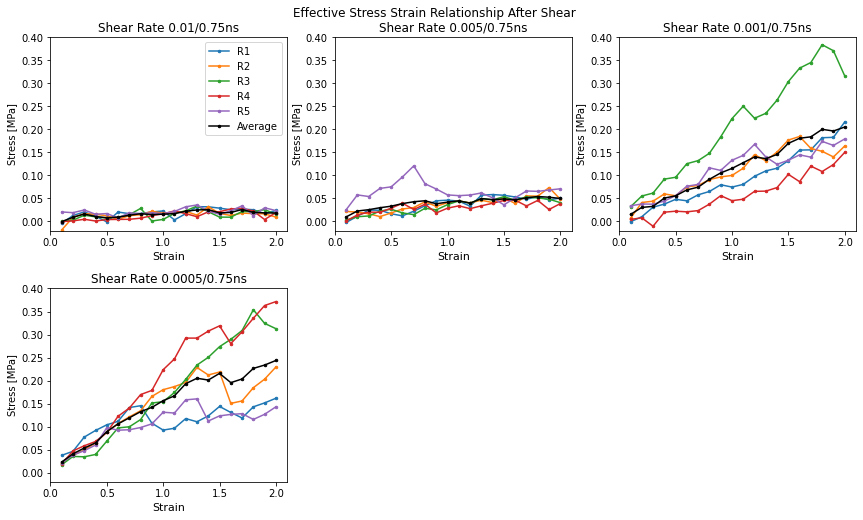

In [9]:
fig = plt.figure(figsize=[12,14])
ax=4*[0]
titles=['Shear Rate 0.01/0.75ns','Shear Rate 0.005/0.75ns','Shear Rate 0.001/0.75ns','Shear Rate 0.0005/0.75ns']
labels=['R1', 'R2', 'R3', 'R4', 'R5', 'Average']
i=0
for nn in erate:
    ax[i]=fig.add_subplot(4,3,i+1)
    for jj in range(5):
        ax[i].plot(strain_data_all[nn][jj], stress_in_x_all[nn][jj]*5.11, '.-',markersize=5,label=labels[jj])
    ax[i].plot(strain_data_all[nn][5], stress_in_x_all[nn][5]*5.11, '.-',markersize=5,c='black',label=labels[5])
    ax[i].set_xlabel('Strain', fontsize=11)
    ax[i].set_title(f'{titles[i]}')
    ax[i].set_xlim([0,2.1])
    ax[i].set_ylim([-0.02,0.4])
    ax[i].set_ylabel('Stress [MPa]')
    i+=1
fig.suptitle('Effective Stress Strain Relationship After Shear')
plt.tight_layout()
ax[0].legend()
plt.show()

## Formatted for GCR Poster

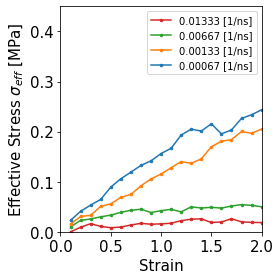

In [13]:
fig = plt.figure(figsize=[4,4])
labels=[f'{round(0.01/0.75,5)} [1/ns]',f'{round(0.005/0.75,5)} [1/ns]',f'{round(0.001/0.75,5)} [1/ns]',f'{round(0.0005/0.75,5)} [1/ns]']
i=0
colors=['C3','C2','C1','C0']
for nn in erate:
    plt.plot(strain_data_all[nn][5], stress_in_x_all[nn][5]*5.11,'.-',markersize=5,label=labels[i],color=colors[i])
#     plt.errorbar(strain_data_all[nn][5], stress_in_x_all[nn][5]*5.11,stress_in_x_all[nn][6]*5.11,'.-',markersize=5,label=labels[i])

    i+=1
plt.legend()
# plt.title('Average Effective Stress Strain Relationship After Shear')
plt.ylabel('Effective Stress $\sigma_{eff}$ [MPa]',fontsize=15)
plt.xlabel('Strain', fontsize=15)
plt.xticks(np.arange(0,2.5,0.5),fontsize=15)
plt.yticks(np.arange(0,0.5,0.1),fontsize=15)
plt.xlim([0,2])
plt.ylim([0,0.45])
plt.tight_layout()
plt.savefig(f'{out_path}/stress_strain_all_erates.jpeg')
plt.show()

# Draft Code

In [7]:
with open(f'{os.getcwd()}/run1/HA1B1A1B1_erate0p01/all_stress_11111.txt') as f:
    lines = f.readlines()

data = np.zeros([len(lines)-2,7])
ii=0
for line in lines:
    if ii>1: # skip 2 lines
        data[ii-2] = line.strip('\n').split(' ')
    ii+=1
totalsteps = data[-1,0]
strain_data = data[:,0]/totalsteps*maxstrain
stress_data = data[:,1:]/volume;

# xx-0.5*(yy+zz)
stress_in_x = stress_data[:,0]-0.5*(stress_data[:,1]+stress_data[:,2])


In [8]:
print(stress_in_x)

[-0.00078125  0.00255208  0.0040625   0.00223958 -0.00015625  0.00401042
  0.00333333  0.00338542  0.0040625   0.00447917  0.00067708  0.00333333
  0.00630208  0.00625     0.00567708  0.005       0.0053125   0.005
  0.00333333  0.0046875 ]


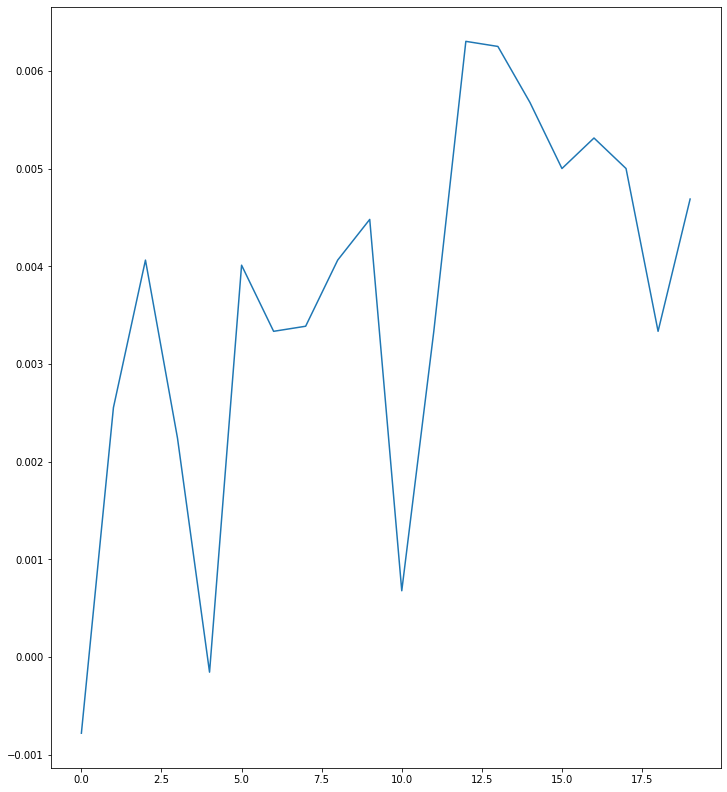

In [10]:
fig = plt.figure(figsize=[12,14])
plt.plot(stress_in_x)